![Image header](Fraud%20Image.png)

**Authors:** Janet Atunga, Colins Wanjao, Anita Bosibori, Ruth Kamau, Bernard Kinyua, Joyleen Cherono

**Date Created:** 06-02-2024

**Discipline:** DS-PT05

<h1 style="background-color: #cfe2f3; padding: 10px; color: black;"><b>Leveraging Machine Learning For Credit Card Fraud Detection</b></h1>

## Executive Summary

## Business Problem

In today's digital economy, fraudulent transactions represent a significant threat to financial institutions and their customers alike. Despite the implementation of various security measures, credit card fraud remains a persistent problem, resulting in substantial financial losses and eroded trust. According to a [recent article](https://www.statista.com/statistics/1394119/global-card-fraud-losses/), global card fraud losses have been on the rise, underscoring the urgency of addressing this issue.

The challenge lies in effectively detecting fraudulent transactions in real-time while minimizing false positives to ensure a seamless customer experience. Therefore, the business problem at hand is to develop an accurate and efficient machine learning model capable of identifying fraudulent credit card transactions with a high level of precision. By doing so, financial institutions can enable timely intervention and mitigation measures, thereby safeguarding their assets and preserving customer trust.

## Research Questions

1. Feature Importance: What are the most significant features contributing to the detection of fraudulent credit card transactions? Understanding the key indicators of fraud can inform feature engineering efforts and enhance model performance.

2. Model Comparison: How do different machine learning algorithms perform in detecting fraudulent transactions? By comparing the performance of various models, we can identify the most effective approach for addressing the business problem at hand.

## Data Understanding

In [6]:
! pip uninstall scikit-learn -y

! pip install scikit-learn 


Found existing installation: scikit-learn 1.3.2
Uninstalling scikit-learn-1.3.2:
  Successfully uninstalled scikit-learn-1.3.2
  Using cached scikit_learn-1.3.2-cp38-cp38-win_amd64.whl (9.3 MB)


In [7]:
# Import Standard Libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns


# Import classifier libraries

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# Other libraries

from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve, confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

In [8]:
import sklearn
print(sklearn.__version__)

1.3.2


### Loading and Inspecting Data Set

In [9]:
# Loading dataset

df = pd.read_csv('creditcardFraud.csv', index_col=0)

In [10]:
# Previewing the dataset

df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
60980,49591.0,-1.078058,0.472978,0.872587,-1.693499,-0.473819,-1.394841,0.390493,0.208516,-1.746987,...,-0.077302,-0.601560,0.095988,0.334340,0.093190,-0.666101,0.158345,0.063077,56.0,0
259679,159224.0,0.140654,0.614854,-0.811093,0.210524,1.090949,-1.436960,1.488835,-0.521849,-0.448717,...,0.364569,1.180486,-0.027099,0.042148,-0.693194,-0.117583,0.242936,0.270430,49.0,0
102727,68332.0,1.492525,-0.937371,0.733062,-1.341682,-1.638440,-0.891609,-1.008324,-0.229074,-1.878821,...,-0.355095,-0.638729,0.164058,0.365213,0.160463,-0.414044,0.047972,0.032811,18.6,0
239078,149947.0,-0.239639,1.464496,-1.486780,-0.021256,-0.058483,-1.380374,0.262271,0.503499,-0.224797,...,0.371395,0.894852,-0.052035,-0.185209,-0.244038,-0.152268,-0.322308,-0.117872,22.5,0
152955,97655.0,2.067000,0.396577,-2.528664,0.231966,1.029264,-1.260592,0.644661,-0.469112,1.178047,...,-0.015175,0.257566,-0.031586,0.653762,0.392559,0.145512,-0.109600,-0.058973,16.0,0


In [11]:
# Investigating the size of our DataFrame 

df.shape

(80000, 31)

- The CreditCardFraud data set has a total of 80,000 rows and 31 columns. 

In [12]:
# pulling out the metadata of our dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80000 entries, 60980 to 271634
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    80000 non-null  float64
 1   V1      80000 non-null  float64
 2   V2      80000 non-null  float64
 3   V3      80000 non-null  float64
 4   V4      80000 non-null  float64
 5   V5      80000 non-null  float64
 6   V6      80000 non-null  float64
 7   V7      80000 non-null  float64
 8   V8      80000 non-null  float64
 9   V9      80000 non-null  float64
 10  V10     80000 non-null  float64
 11  V11     80000 non-null  float64
 12  V12     80000 non-null  float64
 13  V13     80000 non-null  float64
 14  V14     80000 non-null  float64
 15  V15     80000 non-null  float64
 16  V16     80000 non-null  float64
 17  V17     80000 non-null  float64
 18  V18     80000 non-null  float64
 19  V19     80000 non-null  float64
 20  V20     80000 non-null  float64
 21  V21     80000 non-null  float6

In [13]:
# Investigate the columns of our data set

df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Further investigation reveals that some of the column names are serialized/anonymized which is consistent with the data set description obtained from [Kaggle](https://www.kaggle.com/code/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets/input). This may be result of a PCA Dimensionality reduction to protect user identities and sensitive features(v1-v28)

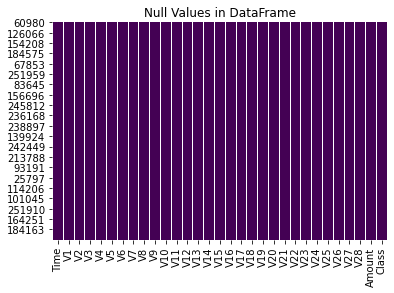

In [14]:
# Use seaborn to create a heatmap of the null values

sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Null Values in DataFrame')
plt.show()


This simple visualization provides a quick glance of the distribution of null values within the data set. There are `zero null values` in the dataset!

#### `Visualizing Class Imbalance`

Given the nature of this classification problem, it's essential to assess the level of class imbalance within our dataset. Visualizing the distribution of class labels enables us to identify any imbalance and take proactive steps to address it before proceeding with the training of our Machine Learning models. This proactive approach ensures that our models are trained on a balanced dataset, which is crucial for achieving optimal performance and generalization capabilities.

In [15]:
# Count and normalize non-fraudulent transactions
non_fraud_count = df['Class'].value_counts()[0]
non_fraud_percentage = df['Class'].value_counts(normalize=True)[0]

# Count and normalize fraudulent transactions
fraud_count = df['Class'].value_counts()[1]
fraud_percentage = df['Class'].value_counts(normalize=True)[1]

# Render the results
print("Non-Fraudulent Transactions: {:,} ({:.2%})".format(non_fraud_count, non_fraud_percentage))
print("Fraudulent Transactions: {:,} ({:.2%})".format(fraud_count, fraud_percentage))


Non-Fraudulent Transactions: 79,881 (99.85%)
Fraudulent Transactions: 119 (0.15%)


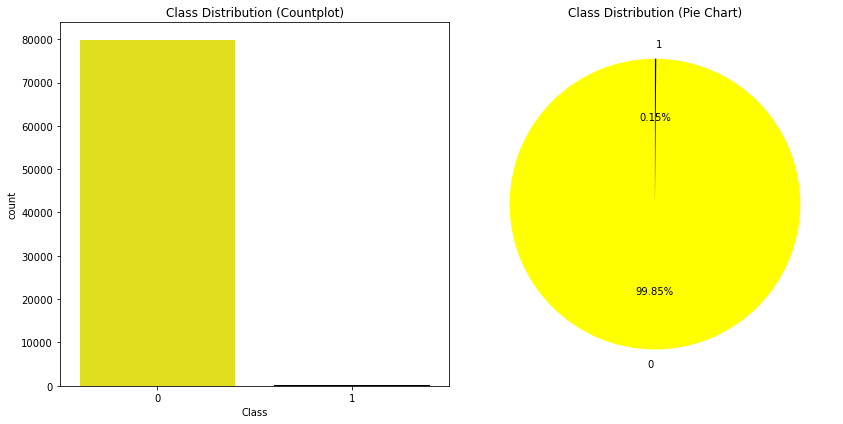

In [16]:

# custom colors for the plot
colors = ['#FFFF00', '#000000']

# Create subplots with two plots side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot countplot
sns.countplot('Class', data=df, palette=colors, ax=axs[0])
axs[0].set_title('Class Distribution (Countplot)')

# Plot pie chart
class_counts = df['Class'].value_counts()
axs[1].pie(class_counts, labels=class_counts.index, autopct='%1.2f%%', colors=colors, startangle=90)
axs[1].set_title('Class Distribution (Pie Chart)')

plt.tight_layout()
plt.show()


The dataset exhibits heavy class imbalance, with an overwhelming majority of transactions, specifically 99.85%, categorized as non-fraudulent. This stark skew towards one class, while common in real-world scenarios, presents a significant challenge for our machine learning algorithms. It underscores the need for robust strategies to handle such class imbalances to ensure that our models are effectively trained to detect the minority class (fraudulent transactions) with sufficient accuracy and precision. Addressing this class imbalance is paramount to the success of our fraud detection system, as failure to do so may lead to biased or inadequate model performance, potentially compromising the system's ability to detect fraudulent activities effectively.

(1.0, 172792.0)

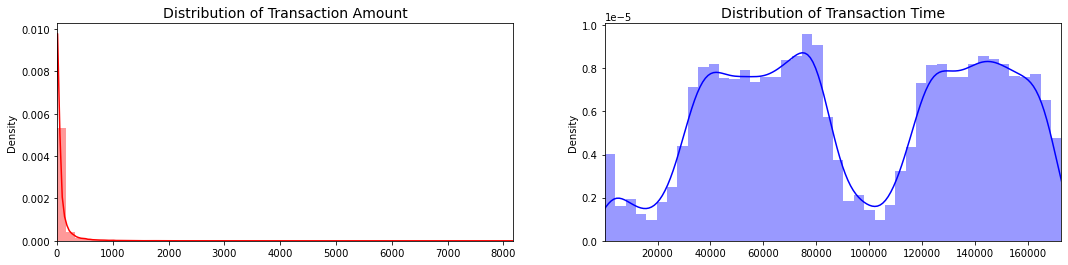

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

## Data Preprocessing

In this critical data preprocessing section, we refine the dataset to optimize it for machine learning model training. Tasks include:

- Feature Selection: Identifying informative features while discarding irrelevant ones to enhance model performance and interpretability. Techniques like ANOVA and correlation analysis aid in this process.
- Data Scaling/Normalization: Ensuring numerical features are on a similar scale to prevent dominance by larger-magnitude features. Methods like Min-Max scaling and Z-score normalization facilitate better model convergence.
- Data Augmentation: Generating synthetic data points, such as through SMOTE, to address class imbalance and enhance model generalization.

### **`Feature Selection`**

- Given the anonymized nature of the features, relying on domain knowledge for feature selection is unfeasible. Instead, statistical tests such as ANOVA are paramount for identifying the most discriminative features for our modeling process. These tests serve as the primary means to gauge the significance of each feature in relation to the target variable, allowing us to prioritize the inclusion of those features that exhibit the strongest association with the outcome of interest.

#### ANOVA TEST (using Sklearn Library)

In [18]:
from sklearn.feature_selection import SelectKBest, f_classif

# Separate features (X) and target variable (y)
X = df.drop(columns=['Class'])  # Features
y = df['Class']  # Target variable

# Initialize SelectKBest with f_classif scoring function
selector = SelectKBest(score_func=f_classif)

# Fit selector to the data
selector.fit(X, y)

# Get selected features
selected_features = X.columns[selector.get_support()]

# Print selected features
print("Selected Features:", selected_features)


Selected Features: Index(['V1', 'V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17'], dtype='object')


Based on ANOVA F-values, the following features ['V1', 'V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17'] will be prioritized in the modeling phase

### **`Data Balancing (SMOTE)`**

To address the class-imbalance issue, Synthetic Minority Over-sampling Technique (SMOTE), a popular data augmentation method will be employed. SMOTE works by generating synthetic samples in the feature space of the minority class (Fraud Case), thereby reducing class imbalance and improving model performance. In this section, we explore the application of SMOTE to rebalance our dataset, ensuring that our machine learning models are trained on a more representative and equitable distribution of class instances.

In [19]:
# Redifine X, y using the Selected Features
selected_features = ['V1', 'V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']
X = df[selected_features]
y = df['Class']

# 1. Perform Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Perform SMOTE (only on training data)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 3. Normalize Numeric Columns (separately for training and testing sets)
scaler = StandardScaler()
X_train_resampled_normalized = scaler.fit_transform(X_train_resampled)
X_test_normalized = scaler.transform(X_test)


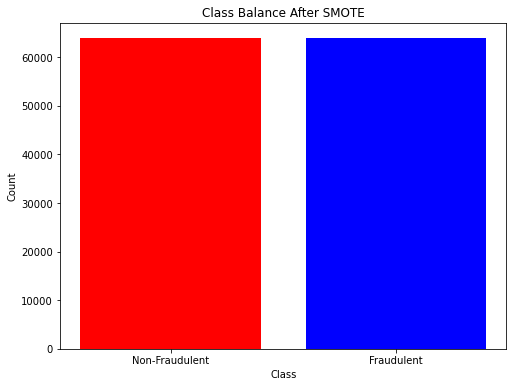

In [20]:
# Plot the class balance after SMOTE
plt.figure(figsize=(8, 6))
plt.bar(y_train_resampled.value_counts().index, y_train_resampled.value_counts().values, color=['blue', 'red'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Balance After SMOTE')
plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'])
plt.show()


In [21]:
# Keeping it simple with the variable names:assign the transformed variables to the simpler variable names 

X_train = X_train_resampled_normalized
y_train = y_train_resampled

In [22]:
X_train_df = pd.DataFrame(X_train, columns =selected_features)
X_train_df


,V1,V3,V4,V7,V10,V11,V12,V14,V16,V17
0,0.667232,0.694711,-0.599871,0.383210,0.587429,-0.221333,0.909831,0.742252,0.527955,0.534881
1,0.673757,0.678957,-0.721152,0.361066,0.622613,-0.221508,0.840697,0.782518,0.821741,0.386532
2,0.688301,0.601192,-0.784756,0.434939,0.612672,-0.196851,0.834052,0.846236,0.730914,0.421150
3,0.159065,0.841773,-0.720501,0.595280,0.764547,-0.555184,0.767820,0.702692,0.559994,0.487438
4,0.609707,0.788635,-0.357917,0.255905,0.561143,0.090960,1.069445,0.710418,0.261819,0.659568
...,...,...,...,...,...,...,...,...,...,...
127799,-1.997590,-2.270153,2.247077,-2.360462,-2.812341,2.073996,-3.054956,-1.986611,-2.996806,-2.816328
127800,-1.672370,-1.825430,0.734526,-1.169686,-0.879049,0.408849,-0.788556,-0.885321,-0.703679,-0.757038
127801,0.081782,-0.111496,-0.704665,0.275929,-0.152055,0.013463,-0.130939,-0.487627,-0.652290,-0.073122
127802,-0.072088,0.098077,-0.049669,0.286397,0.114495,0.148527,-0.046545,-0.614007,-0.229839,-0.219149


In [23]:
y_train_df = pd.DataFrame(y_train, columns= ['Class'])
y_train_df

,Class
0,0
1,0
2,0
3,0
4,0
...,...
127799,1
127800,1
127801,1
127802,1


In [24]:
X_test = X_test_normalized
X_test_df= pd.DataFrame(X_test, columns= selected_features)
X_test_df

,V1,V3,V4,V7,V10,V11,V12,V14,V16,V17
0,-0.991517,0.272823,-0.503334,0.307697,0.711695,-0.397313,0.828863,0.847083,0.690881,0.577821
1,0.022268,0.511424,-0.808216,0.547971,0.329422,-0.890381,0.652807,0.664457,0.607781,0.708640
2,0.731258,0.613659,-1.178104,0.332331,1.006451,-0.005756,0.770114,0.720421,0.424992,0.606100
3,0.214084,0.136233,-0.302092,0.653493,0.441159,-0.281938,0.922046,0.866220,0.567814,0.483932
4,0.918022,0.337940,-1.245766,0.218371,1.017064,-1.249898,0.242934,0.714565,0.437519,0.622962
...,...,...,...,...,...,...,...,...,...,...
15995,0.621901,0.690377,-0.763302,0.321621,0.587654,-0.201210,0.723402,0.830088,0.792696,0.442931
15996,0.676894,0.659861,-0.296484,0.457842,0.569298,-1.012327,0.896872,0.662341,0.510581,0.476803
15997,0.035063,0.979207,-0.265805,0.685564,0.650173,0.100788,0.880837,0.680242,0.565811,0.465969
15998,0.879462,0.402976,-1.082006,0.213376,0.840317,-0.541526,0.619294,0.673471,1.040876,0.480165


In [25]:
y_test_df = pd.DataFrame(y_test, columns= ['Class'])
y_test_df

,Class
219224,0
224583,0
18105,0
262435,0
238985,0
...,...
40136,0
19272,0
125359,0
249126,0


In [26]:
X_train_df.values

array([[ 0.66723152,  0.69471089, -0.59987112, ...,  0.74225158,
         0.52795547,  0.5348805 ],
       [ 0.6737566 ,  0.67895727, -0.72115203, ...,  0.78251825,
         0.82174083,  0.38653159],
       [ 0.68830135,  0.60119176, -0.78475553, ...,  0.84623647,
         0.73091371,  0.42115013],
       ...,
       [ 0.08178221, -0.11149645, -0.70466488, ..., -0.48762668,
        -0.65228981, -0.07312163],
       [-0.07208811,  0.09807656, -0.04966916, ..., -0.61400705,
        -0.22983884, -0.2191488 ],
       [ 0.33103018,  0.00810798, -0.79365188, ...,  0.19682375,
         0.6177961 ,  0.85404561]])

## Modeling

- In the modeling phase, we apply machine learning algorithms to the preprocessed data to develop predictive models. The model function trains a classifier on the training data, evaluates its performance using cross-validation and ROC AUC score, and plots the Receiver Operating Characteristic (ROC) curve. The model_evaluation function assesses the trained model's performance using a confusion matrix and classification report, providing insights into its predictive accuracy and error types. These steps collectively enable us to iteratively refine and evaluate our models to achieve optimal predictive performance.

In [27]:
def model(classifier, x_train, y_train, x_test, y_test):
    classifier.fit(x_train, y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    print("Cross Validation Score : ", '{0:.2%}'.format(cross_val_score(classifier, x_train, y_train, cv=cv, scoring='roc_auc').mean()))
    print("ROC_AUC Score : ", '{0:.2%}'.format(roc_auc_score(y_test, prediction)))
    
    # Compute ROC curve and ROC area for each class
    fpr, tpr, _ = roc_curve(y_test, prediction)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    
def model_evaluation(classifier,x_test,y_test):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Oranges',fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

### Logistic Regression

Cross Validation Score :  99.09%
ROC_AUC Score :  95.49%


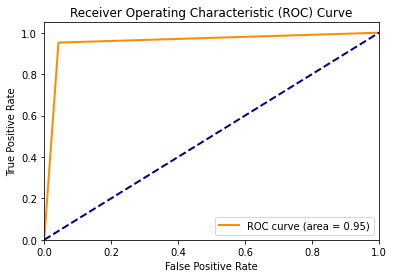

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     15979
           1       0.03      0.95      0.06        21

    accuracy                           0.96     16000
   macro avg       0.51      0.95      0.52     16000
weighted avg       1.00      0.96      0.98     16000



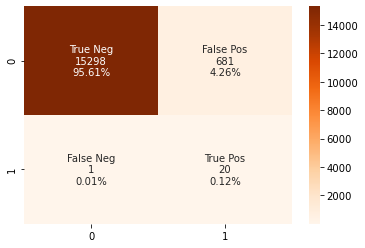

In [39]:
# Training our Vanilla Model using Default Parameters 

# Instantiating LogisitRegression

classifier_lr = LogisticRegression(random_state=42)

model(classifier_lr, X_train, y_train, X_test, y_test)
model_evaluation(classifier_lr, X_test, y_test)

In [44]:
# Define the hyperparameter distribution
param_dist = {
    'penalty': [ 'l1', 'l2', 'none'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 400, 500]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=classifier_lr,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings that are sampled
    cv=5,        # 5-fold cross-validation
    random_state=42,
    n_jobs=-1  # Use all available CPU cores
)

# Perform random search
random_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding best score
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'solver': 'saga', 'penalty': 'l2', 'max_iter': 300, 'C': 4.281332398719396}


Cross Validation Score :  99.09%
ROC_AUC Score :  95.49%


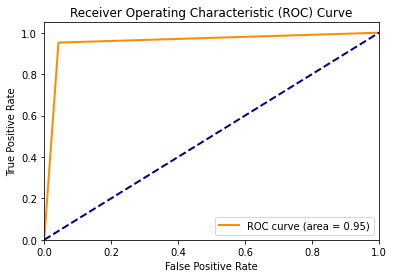

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     15979
           1       0.03      0.95      0.06        21

    accuracy                           0.96     16000
   macro avg       0.51      0.95      0.52     16000
weighted avg       1.00      0.96      0.98     16000



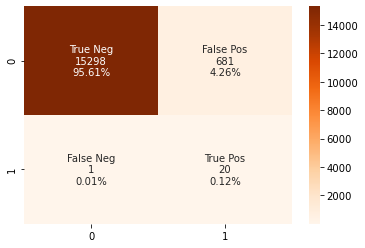

In [48]:
# Test tuned_model with refined paramaters on the test set

classifier_lr_tuned = LogisticRegression(solver='saga', penalty='l2', max_iter=300, C=4.281332398719396)

model(classifier_lr_tuned, X_train, y_train, X_test, y_test)
model_evaluation(classifier_lr_tuned, X_test, y_test)

### Decision Tree Classifier



Cross Validation Score :  99.82%
ROC_AUC Score :  92.70%


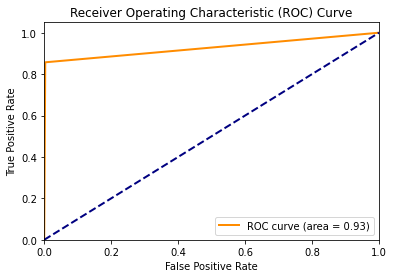

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15979
           1       0.26      0.86      0.40        21

    accuracy                           1.00     16000
   macro avg       0.63      0.93      0.70     16000
weighted avg       1.00      1.00      1.00     16000



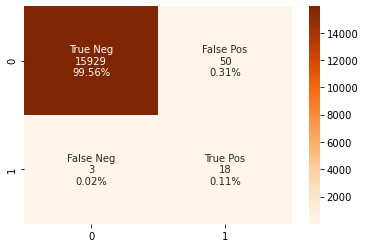

In [32]:
# Training our Vanilla Model using Default Parameters 

# Instantiating DecisionTreeClassifier

classifier_dt = DecisionTreeClassifier(random_state=42)

model(classifier_dt, X_train, y_train, X_test, y_test)
model_evaluation(classifier_dt, X_test, y_test)

In [30]:
#hyperparameter tuning using random search-decision tree classifier

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameter space
param_dist = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_depth": randint(1, 20),
    "min_samples_split": randint(2, 20),
    "min_samples_leaf": randint(1, 20),
    "max_features": ["auto", "sqrt", "log2", None]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator= classifier_dt,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings that are sampled
    cv=5,        # 5-fold cross-validation
    random_state=42,
    n_jobs=-1  # Use all available CPU cores
)

# Perform random search
random_search.fit(X_train, y_train)

# Get the best parameters found
best_params = random_search.best_params_

# Print the best parameters found
print("Best Parameters:")
print(best_params)

Best Parameters:
{'criterion': 'gini', 'max_depth': 19, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 11, 'splitter': 'best'}


Cross Validation Score :  99.87%
ROC_AUC Score :  92.74%


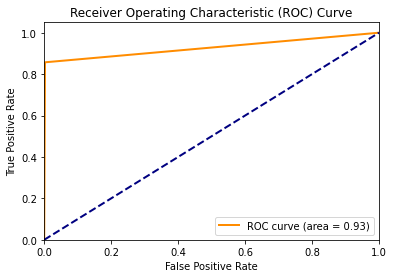

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15979
           1       0.32      0.86      0.47        21

    accuracy                           1.00     16000
   macro avg       0.66      0.93      0.73     16000
weighted avg       1.00      1.00      1.00     16000



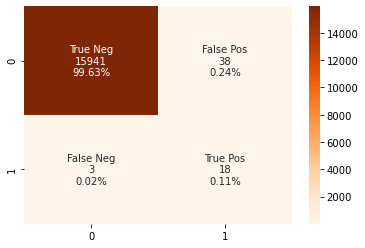

In [31]:
# Test tuned_model with refined paramaters on the test set

classifier_dt_tuned = DecisionTreeClassifier(criterion= 'gini', max_depth=19, max_features='sqrt', 
                                             min_samples_leaf=2, min_samples_split=11, splitter='best')

model(classifier_dt_tuned, X_train, y_train, X_test, y_test)
model_evaluation(classifier_dt_tuned, X_test, y_test)

### K-Nearest Neighbours

Cross Validation Score :  99.94%
ROC_AUC Score :  97.46%


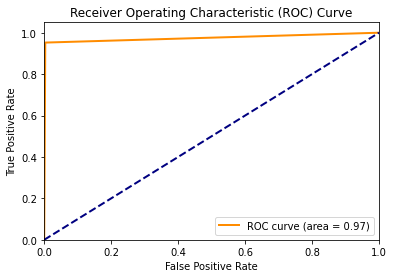

In [ ]:
# Training our Vanilla Model using Default Parameters 

# Instantiating KNeighborsClassifier

knn_classifier= KNeighborsClassifier(random_state=42)

model(knn_classifier, X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15979
           1       0.28      0.95      0.43        21

    accuracy                           1.00     16000
   macro avg       0.64      0.97      0.72     16000
weighted avg       1.00      1.00      1.00     16000



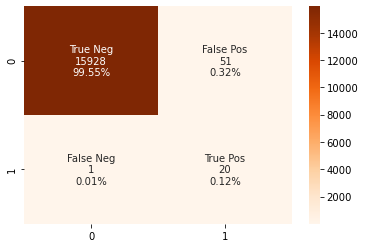

In [ ]:
model_evaluation(knn_classifier, X_test, y_test)

In [ ]:
# Define the parameter grid
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

# Create the KNN classifier
knn_classifier_tuned = KNeighborsClassifier()

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(knn_classifier_tuned, param_grid, cv=3)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameter value
best_n_neighbors = grid_search.best_params_['n_neighbors']

# Print the best parameter value
print("Best n_neighbors:", best_n_neighbors)


Best n_neighbors: 3


Cross Validation Score :  99.94%
ROC_AUC Score :  97.51%


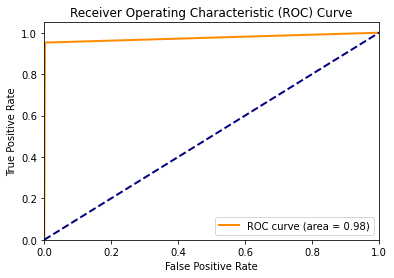

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15979
           1       0.28      0.95      0.43        21

    accuracy                           1.00     16000
   macro avg       0.64      0.97      0.72     16000
weighted avg       1.00      1.00      1.00     16000



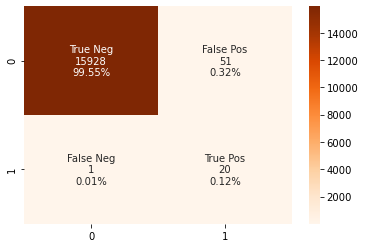

In [ ]:
# Test tuned_model with refined paramaters on the test set

# Remember default n_neighbors = 5

knn_classifier_tuned = KNeighborsClassifier(n_neighbors=3)
model(knn_classifier_tuned, X_train, y_train, X_test, y_test)
model_evaluation(knn_classifier_tuned, X_test, y_test)

### Random Forest Classifier

In [36]:
# Instantiating RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=1, n_jobs=-1)

#hyperparameter tuning using random search

param_dist = {'n_estimators': randint(50,100),
              'max_depth': randint(1,5)}

rand_search = RandomizedSearchCV(classifier_rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Perform random search
rand_search.fit(X_train, y_train)

# Get the best parameters found
best_params = rand_search.best_params_

# Print the best parameters found
print("Best Parameters:")
print(best_params)

Best Parameters:
{'max_depth': 2, 'n_estimators': 75}


Cross Validation Score :  98.29%
ROC_AUC Score :  97.02%


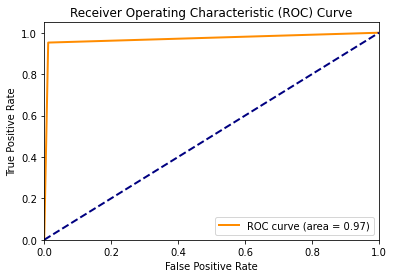

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     15979
           1       0.09      0.95      0.17        21

    accuracy                           0.99     16000
   macro avg       0.55      0.97      0.58     16000
weighted avg       1.00      0.99      0.99     16000



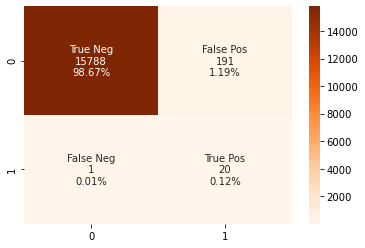

In [38]:
# Test tuned_model with refined paramaters on the test set

classifier_rf_tuned = RandomForestClassifier(max_depth=2, n_estimators=75, random_state=42, n_jobs=-1)

model(classifier_rf_tuned, X_train, y_train, X_test, y_test)
model_evaluation(classifier_rf_tuned, X_test, y_test)